In [1]:
!pip install pandas numpy matplotlib seaborn plotly


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 49.8 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
#Load the dataset
df = pd.read_csv("./data/Bitcoin_history_data.csv", parse_dates=['Date'])
# Display the first few rows of the dataset
df.head()

,Date,Close,High,Low,Open,Volume
0,2014-09-17,457.334015,468.174011,452.421997,465.864014,21056800
1,2014-09-18,424.440002,456.859985,413.104004,456.859985,34483200
2,2014-09-19,394.795990,427.834991,384.532013,424.102997,37919700
3,2014-09-20,408.903992,423.295990,389.882996,394.673004,36863600
4,2014-09-21,398.821014,412.425995,393.181000,408.084991,26580100


In [5]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3966 entries, 0 to 3965
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3966 non-null   datetime64[ns]
 1   Close   3966 non-null   float64       
 2   High    3966 non-null   float64       
 3   Low     3966 non-null   float64       
 4   Open    3966 non-null   float64       
 5   Volume  3966 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 186.0 KB


Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

In [6]:
df.describe()

,Date,Close,High,Low,Open,Volume
count,3966,3966.000000,3966.000000,3966.000000,3966.000000,3.966000e+03
mean,2020-02-20 12:00:00,23700.720916,24175.471292,23148.369852,23672.235699,2.005692e+10
min,2014-09-17 00:00:00,178.102997,211.731003,171.509995,176.897003,5.914570e+06
25%,2017-06-04 06:00:00,2319.264893,2416.029968,2224.777466,2321.009949,9.596135e+08
50%,2020-02-20 12:00:00,10134.783203,10313.309082,9752.528809,10130.225586,1.612212e+10
75%,2022-11-07 18:00:00,37845.019531,39048.439453,36837.160156,37818.786133,3.140978e+10
max,2025-07-26 00:00:00,119995.414062,123091.609375,118959.195312,119997.445312,3.509679e+11
std,NaN,27883.043425,28377.641054,27301.538662,27846.447559,2.142796e+10


In [7]:
df.sort_values('Date', inplace=True)

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Weekday'] = df['Date'].dt.weekday

In [10]:
df['Price_Change'] = df['Close'] - df['Open']

In [11]:
df['Volatility'] = df['High'] - df['Low']

In [12]:
df['MA7'] = df['Close'].rolling(window=7).mean()
df['MA30'] = df['Close'].rolling(window=30).mean()

In [13]:
df.head(10)

,Date,Close,High,Low,Open,Volume,Year,Month,Weekday,Price_Change,Volatility,MA7,MA30
0,2014-09-17,457.334015,468.174011,452.421997,465.864014,21056800,2014,9,2,-8.529999,15.752014,NaN,NaN
1,2014-09-18,424.440002,456.859985,413.104004,456.859985,34483200,2014,9,3,-32.419983,43.755981,NaN,NaN
2,2014-09-19,394.795990,427.834991,384.532013,424.102997,37919700,2014,9,4,-29.307007,43.302979,NaN,NaN
3,2014-09-20,408.903992,423.295990,389.882996,394.673004,36863600,2014,9,5,14.230988,33.412994,NaN,NaN
4,2014-09-21,398.821014,412.425995,393.181000,408.084991,26580100,2014,9,6,-9.263977,19.244995,NaN,NaN
5,2014-09-22,402.152008,406.915985,397.130005,399.100006,24127600,2014,9,0,3.052002,9.785980,NaN,NaN
6,2014-09-23,435.790985,441.557007,396.196991,402.092010,45099500,2014,9,1,33.698975,45.360016,417.462572,NaN
7,2014-09-24,423.204987,436.112000,421.131989,435.751007,30627700,2014,9,2,-12.546021,14.980011,412.586997,NaN
8,2014-09-25,411.574005,423.519989,409.467987,423.156006,26814400,2014,9,3,-11.582001,14.052002,410.748997,NaN
9,2014-09-26,404.424988,414.937988,400.009003,411.428986,21460800,2014,9,4,-7.003998,14.928986,412.124568,NaN


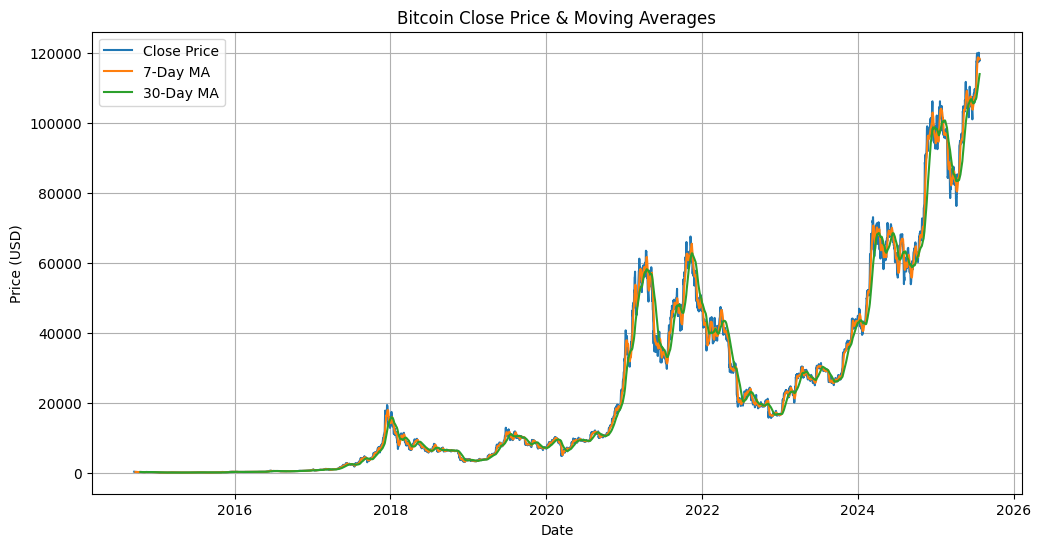

In [14]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.plot(df['Date'], df['MA7'], label='7-Day MA')
plt.plot(df['Date'], df['MA30'], label='30-Day MA')
plt.legend()
plt.title('Bitcoin Close Price & Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid()
plt.show()